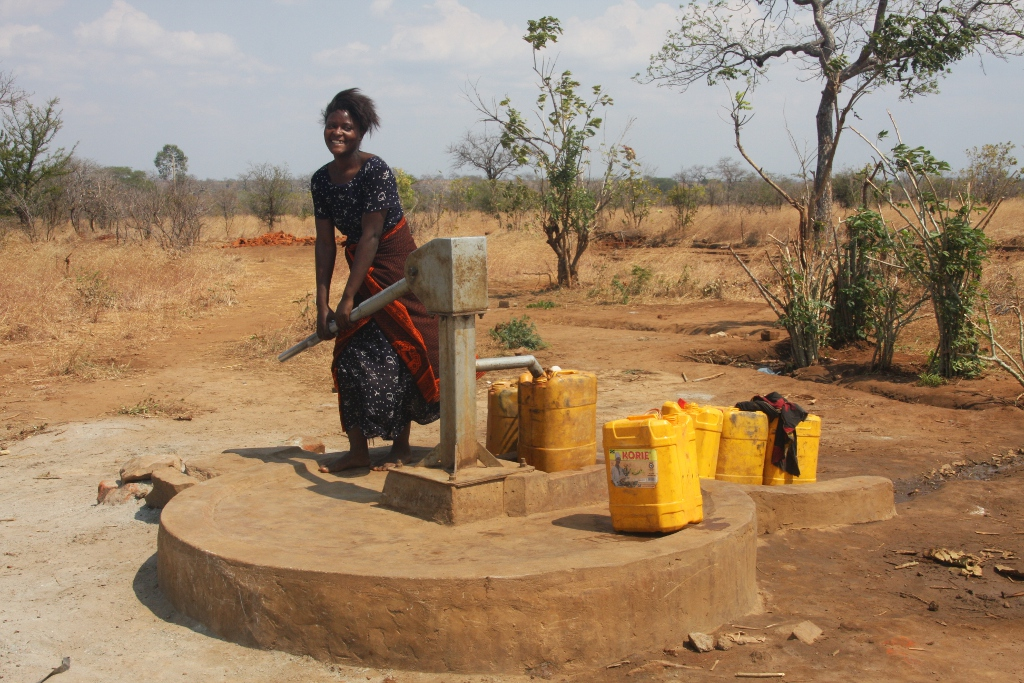

# Tanzania Waterpoint Functionality Classification Using Decision Trees

By: **Alex Karadjov**

>

# Overview

**The goal of the model we are creating is to be able to predict the operating condition of a given waterpoint.**


This is so Tanzania’s Ministry of Water can utilize their resources to repair and maintain the water wells that have the highest likelihood of being in need of repair.



>

# Problems

**This is an important project because Tanzania is in the midst of a water crisis:**


- **4 million** people in the country do **not** have access to a source of **safe drinking water**

- **30 million** people lack access to improved **water sanitation.**

- A better understanding of which **features might be contributing to water pumps functionality** could possibly help ensure that **clean water becomes available** to more people across the country.


>

# Dataset

This data set is derived from **drivendata.org** 

- The data in the datasetcontains information from Taarifa and the Tanzanian Ministry of Water.

- This data set contains over 59,000 data points.

>

## Importing All Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

>

## Import the Data

#### Checking the file paths

In [2]:
import os
cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
print("Files in '%s': %s" % (cwd, files))

Files in 'C:\Users\16047\Documents\Flatiron\waterwells\tanzanian-water-wells\Notebooks': ['.ipynb_checkpoints', 'Final.ipynb', 'README', 'Test.ipynb']


#### Assigning

In [3]:
training_cat = pd.read_csv('C:/Users/16047/Documents/Flatiron/waterwells/tanzanian-water-wells/Data/Training-Set-Values.csv')
training_con = pd.read_csv('C:/Users/16047/Documents/Flatiron/waterwells/tanzanian-water-wells/Data/Training-Set-Labels.csv')
final_test = pd.read_csv('C:/Users/16047/Documents/Flatiron/waterwells/tanzanian-water-wells/Data/Test-Set-Values.csv')

In [4]:
training_cat.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


>

## Cleaning Data Sets to Concat Final Dataframe

### Renaming second id column to remove the one added during concat for the final data frame

In [5]:
training_con = training_con.rename({'id': 'id2'},axis=1)

In [6]:
training_con.head()

,id2,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


>

In [7]:
well_df = pd.concat( [training_cat,training_con], axis = 1 )

In [8]:
well_df = well_df.drop('id2',axis=1)

In [9]:
well_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


>

### Dropping any Duplicates

In [10]:
well_df.drop_duplicates( keep = 'first', inplace = True )

In [11]:
well_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [12]:
well_df.duplicated().sum()

0

>

# EDA of Dataframe

In [13]:
well_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [14]:
well_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

>

## Water Quality and Quality Group Column Comparisons

In [15]:
well_df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [16]:
well_df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

**Almost the same categories slight differences**

>

## Water Quantity and Quantity Group Column Comparisons

In [17]:
well_df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [18]:
well_df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

**Same info dropping quantity_group**

In [19]:
well_df = well_df.drop('quantity_group', axis=1)

>

## Region and Region Code Column Comparisons

In [20]:
well_df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [21]:
well_df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

**Different Values Cannot be Cleaned**

>

## Payment and Payment Type column Comparisons

In [22]:
well_df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [23]:
well_df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

**Dropping 'payment_type' same or less in depth information**

In [24]:
well_df = well_df.drop('payment_type', axis=1)

>

## Managment and Managment Group Column Comparisons

In [25]:
well_df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [26]:
well_df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

**Different N/A Changes**

>

## Water Point Type and Water Point Type Group Column Comparisons

In [27]:
well_df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [28]:
well_df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

**Different N/A Changes**

>

# Starting to Compare important Columns by Cross Tab, to Visualize

In [29]:
well_df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'water_quality',
       'quality_group', 'quantity', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group'],
      dtype='object')

In [30]:
well_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,pay annually,soft,good,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,pay per bucket,soft,good,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


>

### Base Code to Graph Important Columns Compared to Functionality
Reference In README

In [31]:
def plot_stackedbar(df, title, figsize):
    colors = ['#58c625', '#FAC748', '#ff6361']
    labels = list(df.columns)

    fig, ax = plt.subplots(1, figsize=figsize)
    left = len(df) * [0]
    
    for idx, name in enumerate(labels):
        plt.barh(df.index, 
                 df[name], 
                 left=left, 
                 color=colors[idx], 
                 height=0.3)
        left = left + df[name]
        
    # title and subtitle
    plt.title(title, loc='left', fontsize=20, pad=40)
    
    # legend
    plt.legend(labels, 
               bbox_to_anchor=([0.38, 1.1, 0.58, 0]), 
               ncol=3, 
               frameon=True, 
               fontsize=14)
    
    # remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    
    # reset font size for yticks
    ax.tick_params(axis='both', which='major', labelsize=15)
    
plt.show()

>

## Checking Contingency Tables and Graphs of my Top Columns After Inspecting the DataChecking contingency tables to my top choices after inspecting the data

## Region by Status_Group

In [32]:
pd.crosstab(well_df.region, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
region,,,
Iringa,0.782206,0.023234,0.194560
Arusha,0.684776,0.052239,0.262985
Manyara,0.623500,0.060644,0.315856
Kilimanjaro,0.602877,0.073533,0.323590
Pwani,0.590512,0.013662,0.395825
Dar es Salaam,0.572671,0.003727,0.423602
Tanga,0.563801,0.028661,0.407538
Ruvuma,0.560606,0.062121,0.377273
Shinyanga,0.559815,0.127459,0.312726


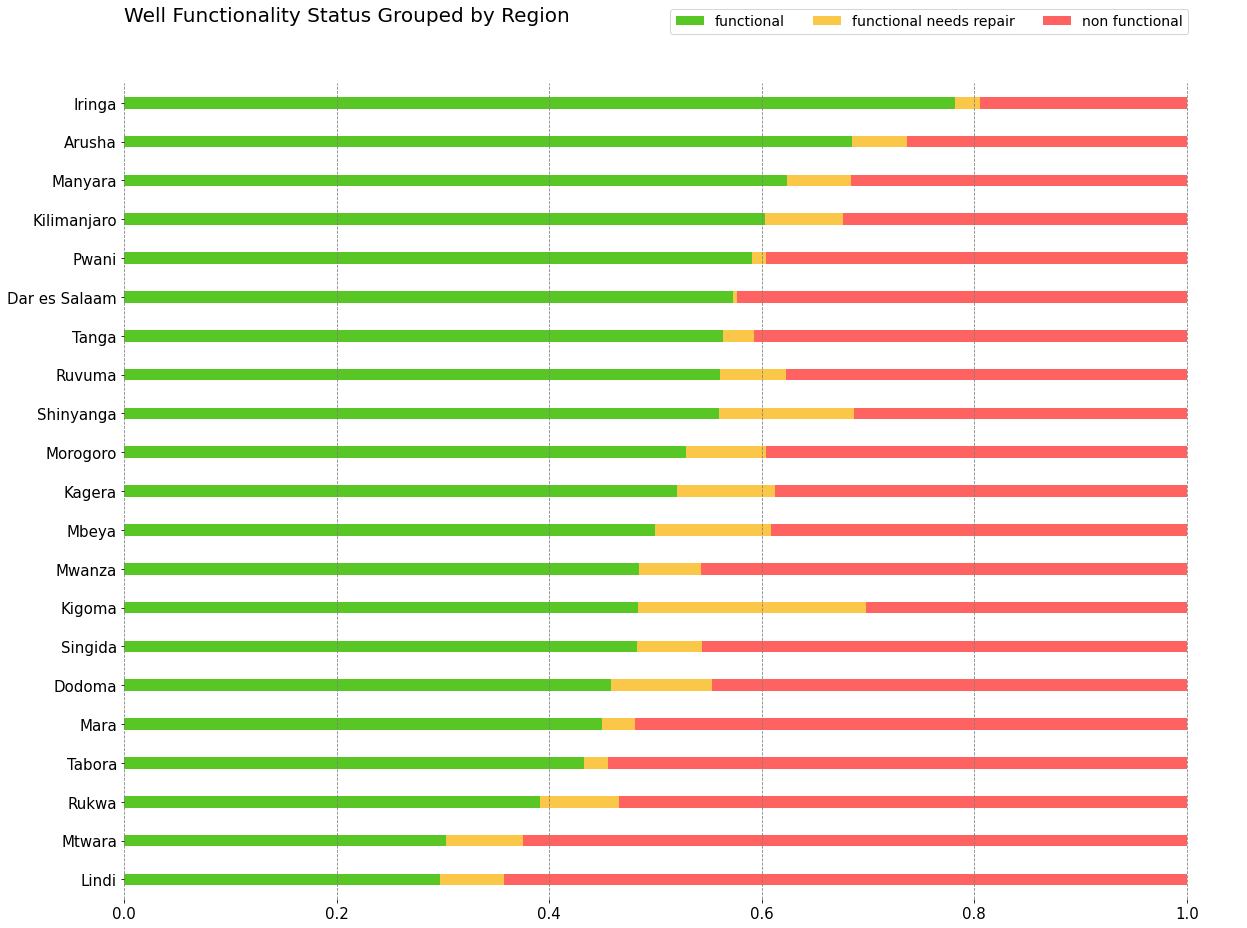

In [33]:
table =pd.crosstab(well_df.region, well_df.status_group, normalize='index').sort_values(by='functional')
title = 'Well Functionality Status Grouped by Region\n'

plot_stackedbar(table, title, (20,15))
plt.show()

>

## Extraction Type by Status_Group

In [34]:
pd.crosstab(well_df.extraction_type_class, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
extraction_type_class,,,
rope pump,0.649667,0.037694,0.312639
handpump,0.630469,0.060464,0.309067
gravity,0.599253,0.100859,0.299888
submersible,0.538760,0.040945,0.420295
wind-powered,0.427350,0.059829,0.512821
motorpump,0.379980,0.046200,0.573820
other,0.160031,0.032037,0.807932


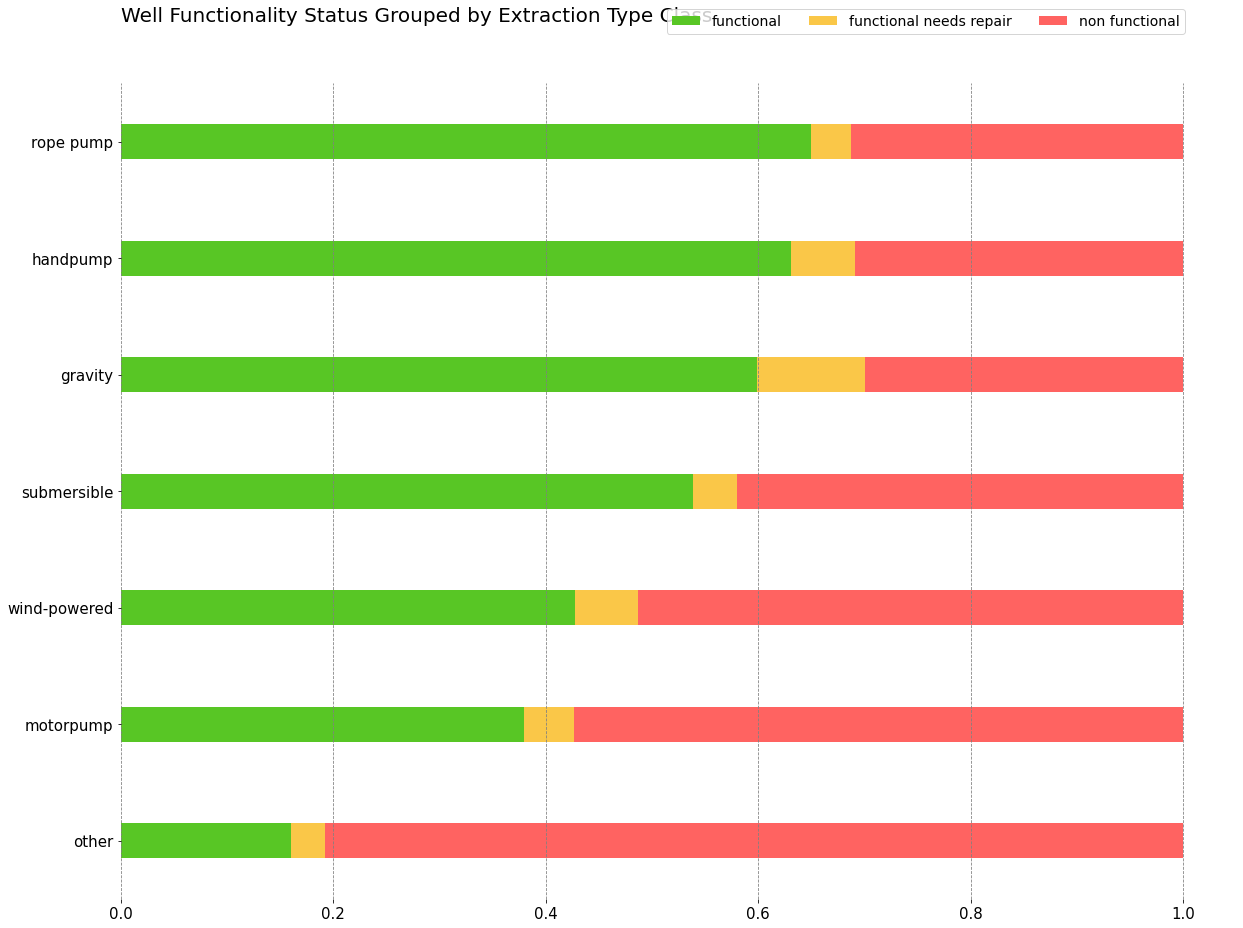

In [35]:
table = pd.crosstab(well_df.extraction_type_class, well_df.status_group, normalize='index').sort_values(by='functional')
title = 'Well Functionality Status Grouped by Extraction Type Class\n'

plot_stackedbar(table, title, (20,15))
plt.show()

>

## Water Point Type by Status_Group

In [36]:
pd.crosstab(well_df.waterpoint_type, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
dam,0.857143,0.000000,0.142857
cattle trough,0.724138,0.017241,0.258621
improved spring,0.718112,0.108418,0.173469
communal standpipe,0.621485,0.079237,0.299278
hand pump,0.617852,0.058840,0.323307
communal standpipe multiple,0.366213,0.106177,0.527609
other,0.131661,0.045925,0.822414


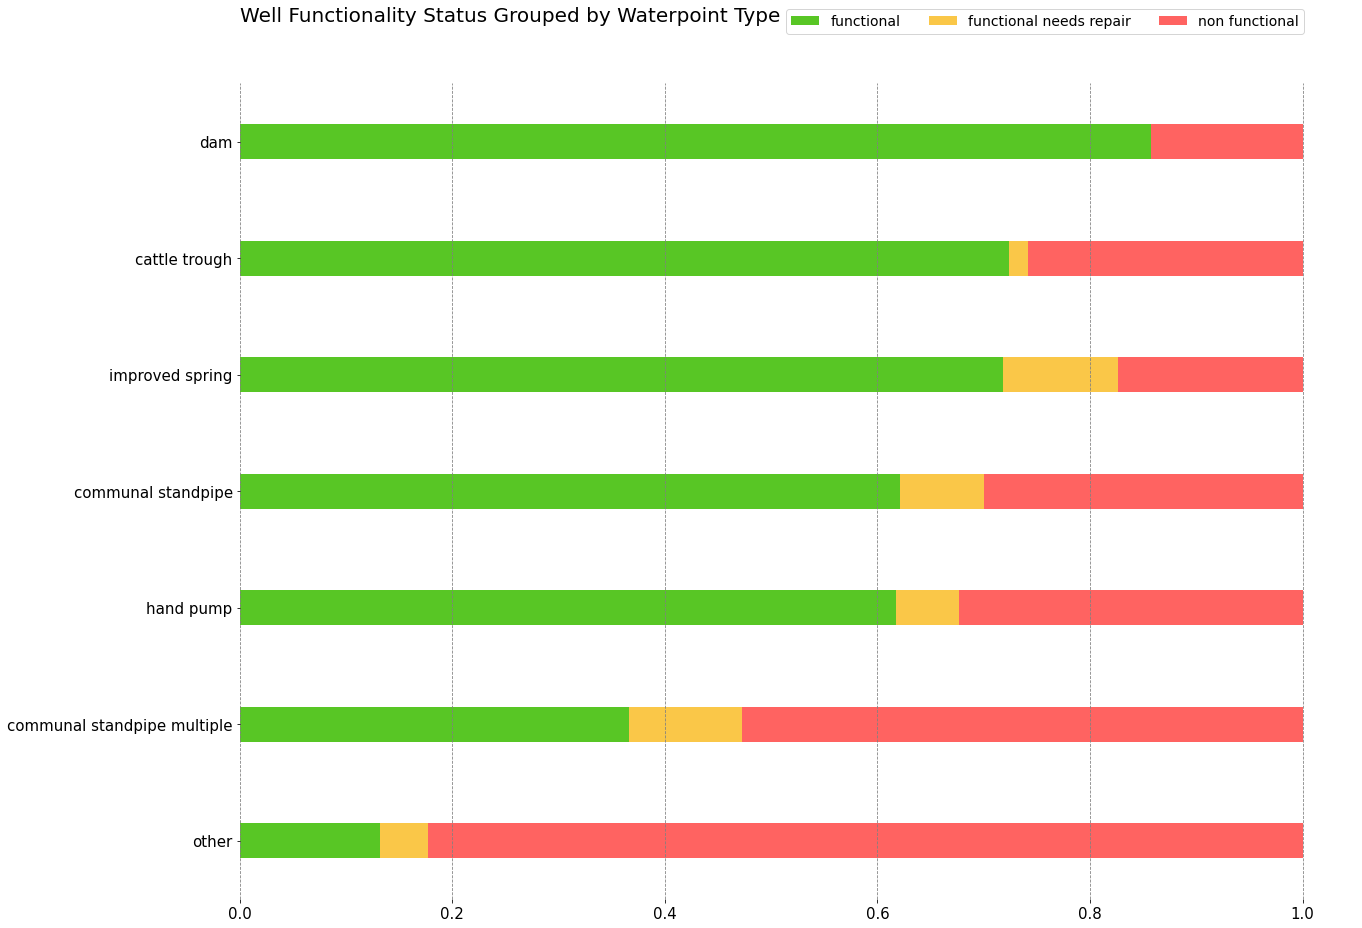

In [37]:
table = pd.crosstab(well_df.waterpoint_type, well_df.status_group, normalize='index').sort_values(by='functional')
title = 'Well Functionality Status Grouped by Waterpoint Type\n'

plot_stackedbar(table, title, (20,15))
plt.show()

>

## Source Type by Status_Group

In [38]:
pd.crosstab(well_df.source_type, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
source_type,,,
spring,0.622290,0.074966,0.302744
rainwater harvesting,0.603922,0.136819,0.259259
other,0.568345,0.017986,0.413669
river/lake,0.542257,0.118820,0.338923
borehole,0.495355,0.042514,0.462131
shallow well,0.494769,0.056883,0.448348
dam,0.385671,0.036585,0.577744


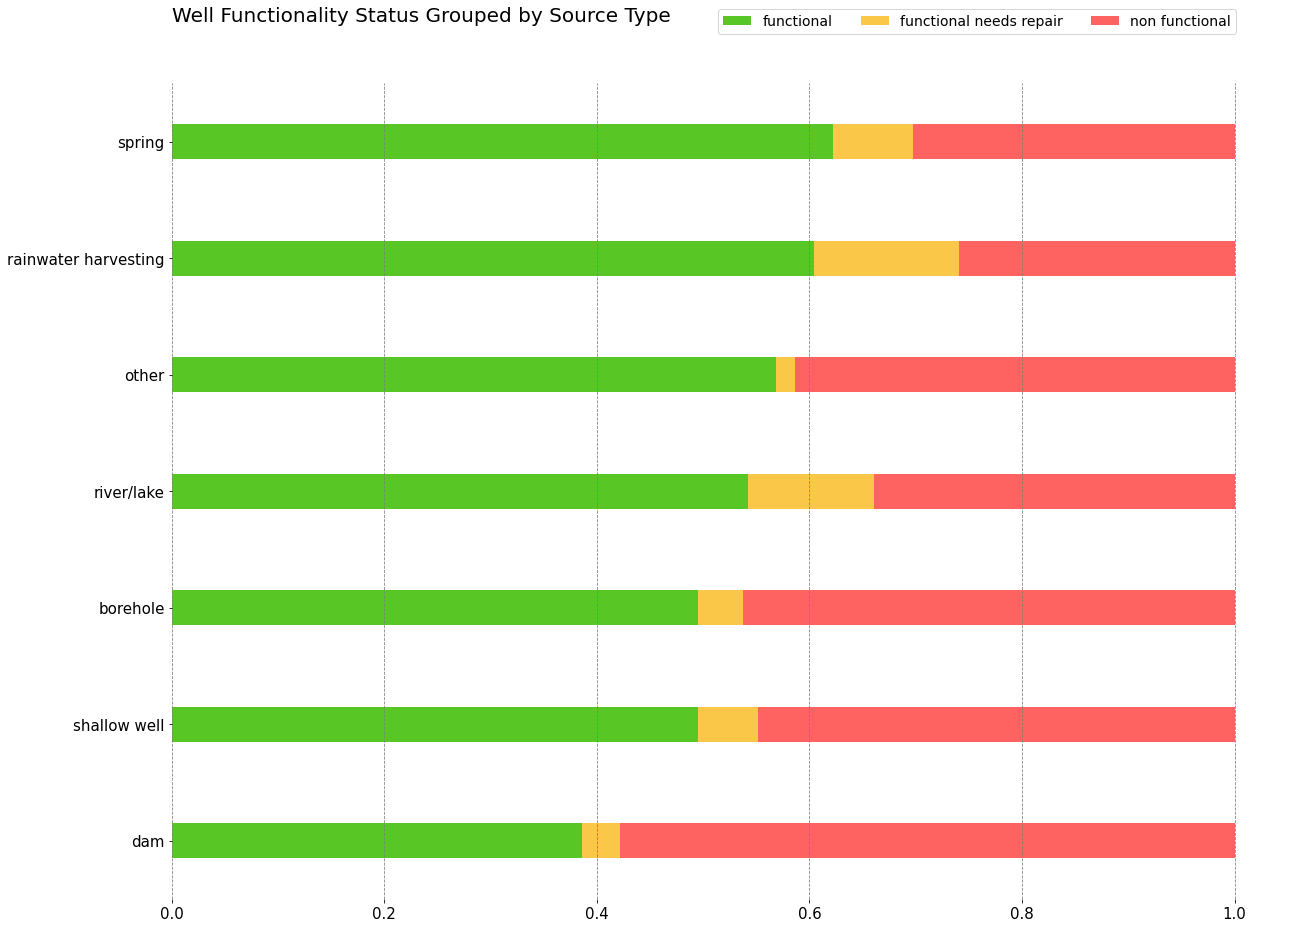

In [39]:
table = pd.crosstab(well_df.source_type, well_df.status_group, normalize='index').sort_values(by='functional')
title = 'Well Functionality Status Grouped by Source Type\n'

plot_stackedbar(table, title, (20,15))
plt.show()

>

## Checking Quantity by Status_Group

In [40]:
pd.crosstab(well_df.quantity, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
quantity,,,
enough,0.652323,0.072320,0.275357
seasonal,0.574074,0.102716,0.323210
insufficient,0.523234,0.095842,0.380924
unknown,0.269962,0.017744,0.712294
dry,0.025136,0.005924,0.968940


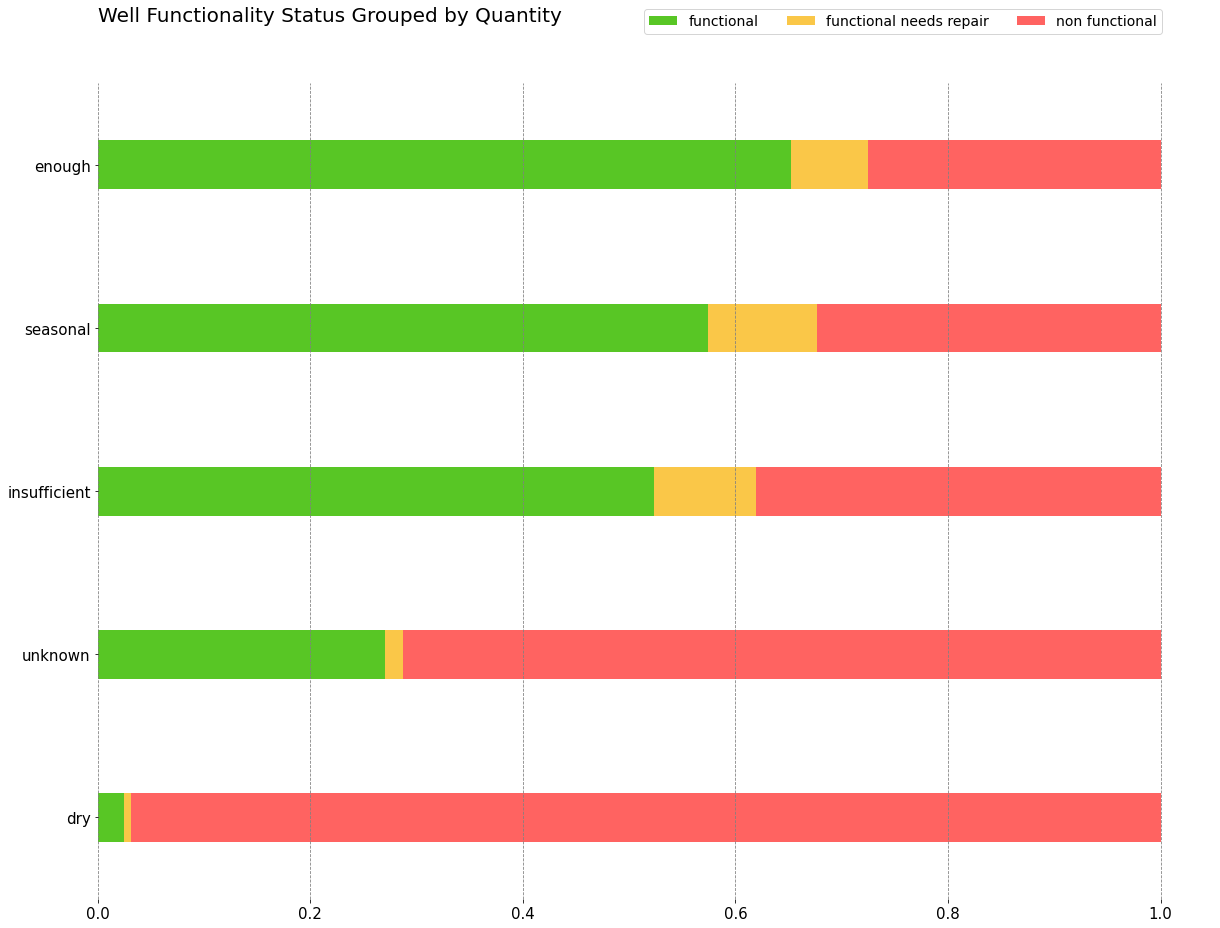

In [41]:
table = pd.crosstab(well_df.quantity, well_df.status_group, normalize='index').sort_values(by='functional')
title = 'Well Functionality Status Grouped by Quantity\n'

plot_stackedbar(table, title, (20,15))
plt.show()

>

### Source Group By Quantity

In [42]:
pd.crosstab(well_df.source_type, well_df.quantity, normalize='index').sort_values(by='enough', ascending=False)

quantity,dry,enough,insufficient,seasonal,unknown
source_type,,,,,
spring,0.095647,0.619235,0.258504,0.019799,0.006815
borehole,0.123190,0.604988,0.224287,0.023684,0.023851
river/lake,0.083550,0.594873,0.228872,0.082105,0.010600
dam,0.099085,0.567073,0.274390,0.045732,0.013720
shallow well,0.120542,0.501843,0.284237,0.080480,0.012898
other,0.129496,0.482014,0.244604,0.043165,0.100719
rainwater harvesting,0.065359,0.128540,0.280610,0.515033,0.010458


>

### Extraction Type by Quantity

In [43]:
pd.crosstab(well_df.extraction_type, well_df.quantity, normalize='index').sort_values(by='enough', ascending=False)

quantity,dry,enough,insufficient,seasonal,unknown
extraction_type,,,,,
cemo,0.000000,0.944444,0.055556,0.000000,0.000000
ksb,0.076325,0.785866,0.115194,0.008481,0.014134
india mark iii,0.061224,0.765306,0.132653,0.010204,0.030612
walimi,0.041667,0.687500,0.208333,0.062500,0.000000
afridev,0.044633,0.646328,0.276836,0.024294,0.007910
other - rope pump,0.066519,0.625277,0.243902,0.055432,0.008869
other - swn 81,0.052402,0.624454,0.253275,0.043668,0.026201
india mark ii,0.099583,0.614167,0.206667,0.069167,0.010417
submersible,0.089001,0.579765,0.272460,0.035474,0.023300


>

### Construction Year by Status_Group

In [44]:
pd.crosstab(well_df.construction_year, well_df.status_group, normalize='index').sort_values(by='functional', ascending=False)

status_group,functional,functional needs repair,non functional
construction_year,,,
2010,0.764839,0.034026,0.201134
2011,0.750796,0.062102,0.187102
1999,0.708887,0.048008,0.243105
2008,0.703789,0.048603,0.247608
2009,0.700355,0.054481,0.245164
2007,0.681159,0.073094,0.245747
2012,0.669742,0.047048,0.283210
2003,0.643857,0.055210,0.300933
2002,0.643721,0.053953,0.302326


>

# Creating Dummy/Baseline Model

### Dummy Model Columns

In [45]:
ohe = OneHotEncoder(drop='first')



dummies = ohe.fit_transform(well_df[['extraction_type_class', 'quality_group', 
                                'quantity','source_class', 'basin', 
                                'management_group', 'payment', 'region']])


dummies_df = pd.DataFrame(dummies.todense(), columns=ohe.get_feature_names(),
                         index=well_df.index)



dummies_df.head()

,x0_handpump,x0_motorpump,x0_other,x0_rope pump,x0_submersible,x0_wind-powered,x1_fluoride,x1_good,x1_milky,x1_salty,...,x7_Morogoro,x7_Mtwara,x7_Mwanza,x7_Pwani,x7_Rukwa,x7_Ruvuma,x7_Shinyanga,x7_Singida,x7_Tabora,x7_Tanga
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


>

### Splitting Data for Dummy Model

In [46]:
y = well_df['status_group']



X = dummies_df



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

>

### Classifying Dummy Model and Fitting

In [47]:
dummy_model = DummyClassifier(random_state=42)



dummy_model.fit(X_train, y_train)



dummy_preds=dummy_model.predict(X_train)

C:\Users\16047\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


>

### Scores

In [48]:
print('Classification Report')
print(classification_report(y_train, dummy_preds))

Classification Report
                         precision    recall  f1-score   support

             functional       0.54      0.54      0.54     25802
functional needs repair       0.06      0.06      0.06      3466
         non functional       0.39      0.39      0.39     18252

               accuracy                           0.45     47520
              macro avg       0.33      0.33      0.33     47520
           weighted avg       0.45      0.45      0.45     47520



In [49]:
print('Confusion Matrix')
print(confusion_matrix(y_train, dummy_preds))

Confusion Matrix
[[13986  1897  9919]
 [ 1901   220  1345]
 [ 9846  1320  7086]]


**45% Accuracy, Decent Baseline/Dummy Model**

>

### Confusion Matrix Visual for Dummy

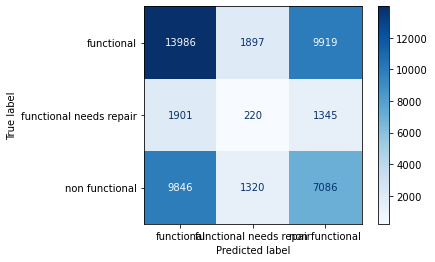

In [50]:
fig, ax = plt.subplots()
plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="Blues");

**Functional 0.55**, **Functional needs repair 0.06**, **Nonfunctional 0.39**

>

# Final Model

In [51]:
main = well_df

In [52]:
main.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
water_quality                0
quality_group                0
quantity

>

## Filling in Nans for Final Data Frame

In [53]:
for col in ['funder', 'installer', 'public_meeting', 'scheme_management', 'scheme_name' , 'subvillage', 'permit']:
    main[col].fillna('NaN', inplace=True)
    main[col].astype(str, copy=False)

In [54]:
main.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
water_quality            0
quality_group            0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

>

## Selecting only the Columns wanted in the Final Model
#### These Columns were chosen after EDA and which columns felt most significant

In [55]:
main = main[['status_group','lga','quantity','quality_group','management_group',
            'extraction_type','source_type','waterpoint_type']]

>

## Splitting Data

In [56]:
X = main.drop('status_group', axis = 1)
y = main['status_group']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42 )

>

## Checking Data Set Splits Looks Good

In [58]:
X_train.shape

(44550, 7)

In [59]:
print(X_train)

                 lga      quantity quality_group management_group  \
24947       Bagamoyo  insufficient         salty       user-group   
22630           Magu        enough          good       user-group   
13789         Kwimba        enough          good       user-group   
15697  Singida Urban      seasonal          good       user-group   
22613         Mbinga           dry          good       user-group   
...              ...           ...           ...              ...   
54343         Ulanga        enough          good       user-group   
38158         Ludewa      seasonal          good       user-group   
860          Pangani  insufficient          good       commercial   
15795          Meatu        enough          good       user-group   
56422          Rombo        enough          good       commercial   

      extraction_type           source_type              waterpoint_type  
24947             ksb              borehole           communal standpipe  
22630     nira/tanira

In [60]:
print(y_train)

24947    non functional
22630        functional
13789        functional
15697        functional
22613    non functional
              ...      
54343        functional
38158        functional
860      non functional
15795        functional
56422    non functional
Name: status_group, Length: 44550, dtype: object


>

## Creating Classes for Pipeline 

**Custom Imputer Class fro Categorical and Numerical missing values**

In [61]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        self.imputer = None
        self.statistics_ = None
    
    def fit(self, X, y=None):
        if self.strategy not in ['mean', 'median', 'most_frequent']:
            raise ValueError("Invalid strategy. Expected 'mean', 'median', or 'most_frequent'.")
        
        self.imputer = SimpleImputer(strategy=self.strategy)
        self.imputer.fit(X)
        self.statistics_ = self.imputer.statistics_
        return self
    
    def transform(self, X):
        if self.imputer is None:
            raise ValueError("Imputer has not been fitted. Call fit() before transform().")
        
        return self.imputer.transform(X)

>

**Custom One Hot Encoder to Deal with missing values**

In [62]:
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_features=None):
        self.categorical_features = categorical_features
        self.encoder = None
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        if self.categorical_features is None:
            # Assuming the categorical features are specified as indices
            num_columns = X.shape[1]
            self.categorical_features = list(range(num_columns))
        
        self.encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
        self.encoder.fit(X[:, self.categorical_features])
        
        unique_values = [np.unique(X[:, col]) for col in self.categorical_features]
        self.feature_names_ = [f"{col_name}_{value}" for col, values in zip(self.categorical_features, unique_values)
                               for col_name, value in zip([col] * len(values), values)]
        
        return self
    
    def transform(self, X):
        if self.encoder is None:
            raise ValueError("Encoder has not been fitted. Call fit() before transform().")
        
        encoded_features = self.encoder.transform(X[:, self.categorical_features])
        
        X_encoded = X[:, [col for col in range(X.shape[1]) if col not in self.categorical_features]]
        X_encoded = np.hstack((X_encoded, encoded_features))
        
        return X_encoded

>

## Pipeline Assemble

In [63]:
numeric_features = []
categorical_features = ['quantity','quality_group','management_group',
            'extraction_type','source_type','waterpoint_type']


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', CustomImputer(strategy='median'), numeric_features),
        ('categorical', CustomImputer(strategy='most_frequent'), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('encoding', CustomOneHotEncoder()),
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

>

## Scores of Final Model

In [64]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Classification Report
                         precision    recall  f1-score   support

             functional       0.69      0.92      0.79      8098
functional needs repair       0.33      0.08      0.12      1074
         non functional       0.82      0.55      0.66      5678

               accuracy                           0.72     14850
              macro avg       0.61      0.51      0.52     14850
           weighted avg       0.71      0.72      0.69     14850



In [65]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[7430   82  586]
 [ 889   81  104]
 [2465   80 3133]]


**Overall recall score %45 -> %72, Functional %55 -> %92, Functional needs repair %06 -> %08, Nonfunctional %39 -> %55**

>

## Checking Out Important Features in the Model

Feature: 0  Score: 0.0
Feature: 1  Score: 0.015299663299663346
Feature: 2  Score: 0.022020202020202006
Feature: 3  Score: 0.0702929292929293
Feature: 4  Score: 0.0852727272727273
Feature: 5  Score: 0.10863636363636368
Feature: 6  Score: 0.11670707070707073


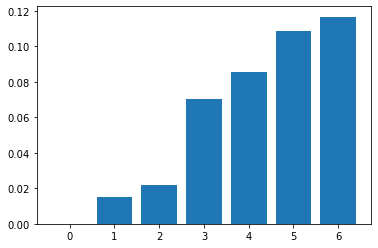

In [66]:
results = permutation_importance(pipeline, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))] ,importance)
pyplot.show()

>

## The Pipeline Steps Feature Importances

In [67]:
pipeline.steps[3][1].feature_importances_

array([4.02370723e-01, 3.42793983e-02, 6.65352997e-03, 7.36692213e-03,
       2.42676963e-03, 2.84807211e-03, 2.69632787e-03, 8.74553796e-03,
       6.33687052e-03, 9.33142526e-03, 1.33390535e-02, 2.44772341e-02,
       6.36800050e-03, 8.38899804e-03, 3.64411385e-03, 1.10831029e-02,
       3.31146660e-03, 1.11164548e-03, 1.68525026e-03, 2.17427453e-02,
       2.87816385e-03, 5.71160588e-04, 8.53588624e-03, 6.47699550e-03,
       1.29256169e-02, 2.95702620e-02, 1.31895218e-04, 8.61193100e-04,
       2.90857205e-03, 1.09908779e-03, 6.30769298e-03, 3.28670411e-03,
       9.20042515e-04, 1.06635792e-03, 1.24680699e-02, 7.60421490e-03,
       3.42615102e-03, 8.46224595e-03, 1.07468314e-02, 8.51536058e-03,
       1.66215197e-02, 9.44256373e-04, 4.26537136e-03, 4.84727991e-02,
       0.00000000e+00, 1.09200552e-02, 4.74702675e-03, 2.07059280e-01])

### Features that are Important

**Feature: 4 (Extraction Type)  Score: 0.0858181818181818, Feature: 5 (Source Type)  Score: 0.10428619528619529, Feature: 6 (Waterpoint Type)  Score: 0.11731986531986534**

>

## Confusion Matrix Visual For Final Model

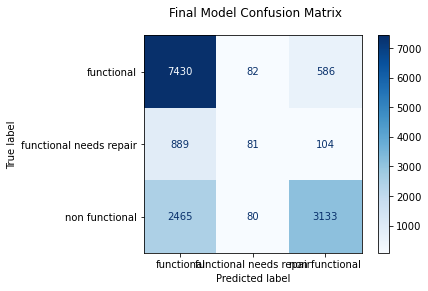

In [68]:
fig, ax = plt.subplots()
figsize=(20,20)
fig.suptitle("Final Model Confusion Matrix")
plot_confusion_matrix(pipeline, X_test, y_test, ax=ax, cmap="Blues");

#### The final model runs better in every aspect